# Reference:
Code: https://github.com/jessgess/Time_Series_Analysis_ARIMA/blob/master/time_series.ipynb

In [91]:
import pandas as pd
# from pandas import datetime as dt
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.api import tsa

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [92]:
url_binance_bnbusdt_3m = "https://api.binance.com/api/v3/klines?symbol=BNBUSDT&limit=1000&interval=3m"
data = pd.read_json(url_binance_bnbusdt_3m)

data.columns = [
    'time', 
    'open', 
    'high', 
    'low', 
    'close', 
    'volume', 
    'close_time', 
    'quote_asset_volume', 
    'number_of_trades', 
    'taker_buy_base_asset_volume', 
    'taker_buy_quote_asset_volume', 
    'unused'
]

data['date'] = pd.to_datetime(df['time'], unit='ms')

data.head()

time   open   high    low  close    volume     close_time  \
0  1667061720000  305.0  305.8  304.8  305.7  1637.512  1667061899999   
1  1667061900000  305.7  305.9  305.3  305.9   605.209  1667062079999   
2  1667062080000  305.9  306.2  305.2  306.0  1189.737  1667062259999   
3  1667062260000  306.0  306.2  305.8  306.1  1190.547  1667062439999   
4  1667062440000  306.0  306.7  305.7  305.8  1710.985  1667062619999   

   quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
0         499905.0169              1110                     1220.263   
1         184956.5552               720                      338.208   
2         363852.8823              1096                      653.138   
3         364335.0427               912                      704.991   
4         523928.0491              1196                      998.216   

   taker_buy_quote_asset_volume  unused                date  
0                   372505.6216       0 2022-10-27 03:05:00  
1                   103358.9417       0 2022-10-27 03:10:00  
2                   199747.6829       0 2022-10-27 03:15:00  
3                   215742.6021       0 2022-10-27 03:20:00  
4                   305683.6475       0 2022-10-27 03:25:00

Text(0, 0.5, 'Close Price')

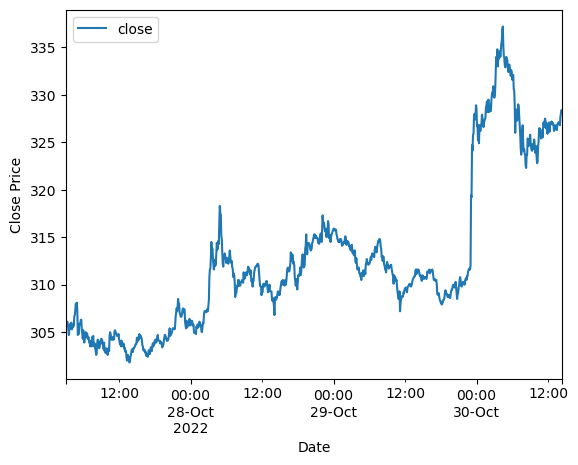

In [93]:
ax = data.plot(x='date', y='close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")

In [94]:
# We can format the Date column and use its unique values as index.
data_study = data.copy()
data_study['date'] = data_study['date']
data_study.set_index(pd.to_datetime(data_study['date']), inplace=True)
data_study.drop('date', axis=1, inplace=True)
data_study

time   open   high    low  close    volume  \
date                                                                       
2022-10-27 03:05:00  1667061720000  305.0  305.8  304.8  305.7  1637.512   
2022-10-27 03:10:00  1667061900000  305.7  305.9  305.3  305.9   605.209   
2022-10-27 03:15:00  1667062080000  305.9  306.2  305.2  306.0  1189.737   
2022-10-27 03:20:00  1667062260000  306.0  306.2  305.8  306.1  1190.547   
2022-10-27 03:25:00  1667062440000  306.0  306.7  305.7  305.8  1710.985   
...                            ...    ...    ...    ...    ...       ...   
2022-10-30 14:00:00  1667240820000  327.2  327.4  326.7  326.8   517.126   
2022-10-30 14:05:00  1667241000000  326.8  327.7  326.7  327.7   639.483   
2022-10-30 14:10:00  1667241180000  327.6  328.1  327.4  328.0  1110.544   
2022-10-30 14:15:00  1667241360000  328.0  328.8  327.9  328.4  2730.307   
2022-10-30 14:20:00  1667241540000  328.4  328.6  328.2  328.3   552.176   

                        close_time  quote_asset_volume  number_of_trades  \
date                                                                       
2022-10-27 03:05:00  1667061899999         499905.0169              1110   
2022-10-27 03:10:00  1667062079999         184956.5552               720   
2022-10-27 03:15:00  1667062259999         363852.8823              1096   
2022-10-27 03:20:00  1667062439999         364335.0427               912   
2022-10-27 03:25:00  1667062619999         523928.0491              1196   
...                            ...                 ...               ...   
2022-10-30 14:00:00  1667240999999         169160.5983               411   
2022-10-30 14:05:00  1667241179999         209299.9132               513   
2022-10-30 14:10:00  1667241359999         364002.1805               819   
2022-10-30 14:15:00  1667241539999         896394.3096              1198   
2022-10-30 14:20:00  1667241719999         181361.7897               257   

                     taker_buy_base_asset_volume  \
date                                               
2022-10-27 03:05:00                     1220.263   
2022-10-27 03:10:00                      338.208   
2022-10-27 03:15:00                      653.138   
2022-10-27 03:20:00                      704.991   
2022-10-27 03:25:00                      998.216   
...                                          ...   
2022-10-30 14:00:00                      203.544   
2022-10-30 14:05:00                      410.656   
2022-10-30 14:10:00                      760.270   
2022-10-30 14:15:00                     1592.097   
2022-10-30 14:20:00                      366.067   

                     taker_buy_quote_asset_volume  unused  
date                                                       
2022-10-27 03:05:00                   372505.6216       0  
2022-10-27 03:10:00                   103358.9417       0  
2022-10-27 03:15:00                   199747.6829       0  
2022-10-27 03:20:00                   215742.6021       0  
2022-10-27 03:25:00                   305683.6475       0  
...                                           ...     ...  
2022-10-30 14:00:00                    66569.8719       0  
2022-10-30 14:05:00                   134394.9429       0  
2022-10-30 14:10:00                   249229.4814       0  
2022-10-30 14:15:00                   522732.9798       0  
2022-10-30 14:20:00                   120234.8712       0  

[1000 rows x 12 columns]

In [95]:
close_price = data_study['close']

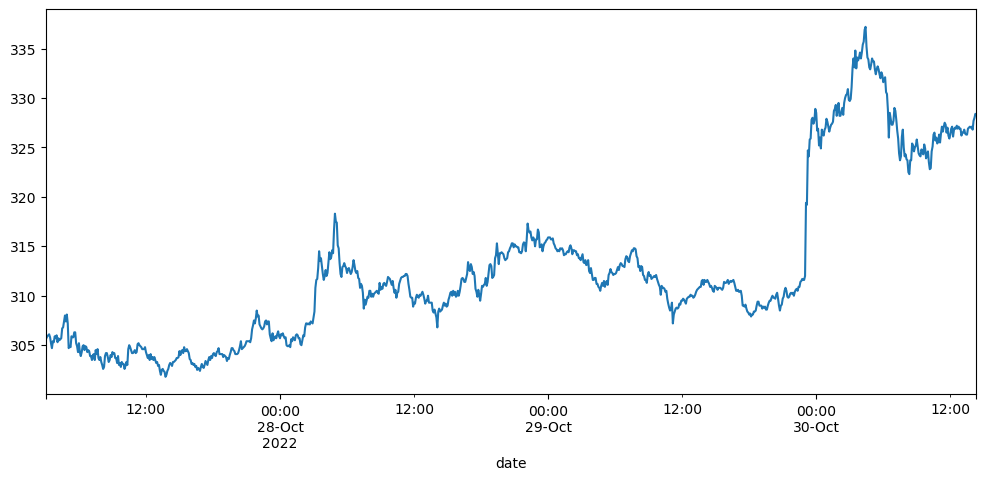

In [96]:
close_price.plot(figsize=(12, 5))
plt.show()

## Moving Average

In [99]:
rroll_p50 = close_price.rolling(window=50).mean()
rroll_p100 = close_price.rolling(window=100).mean()
rroll_p200 = close_price.rolling(window=200).mean()

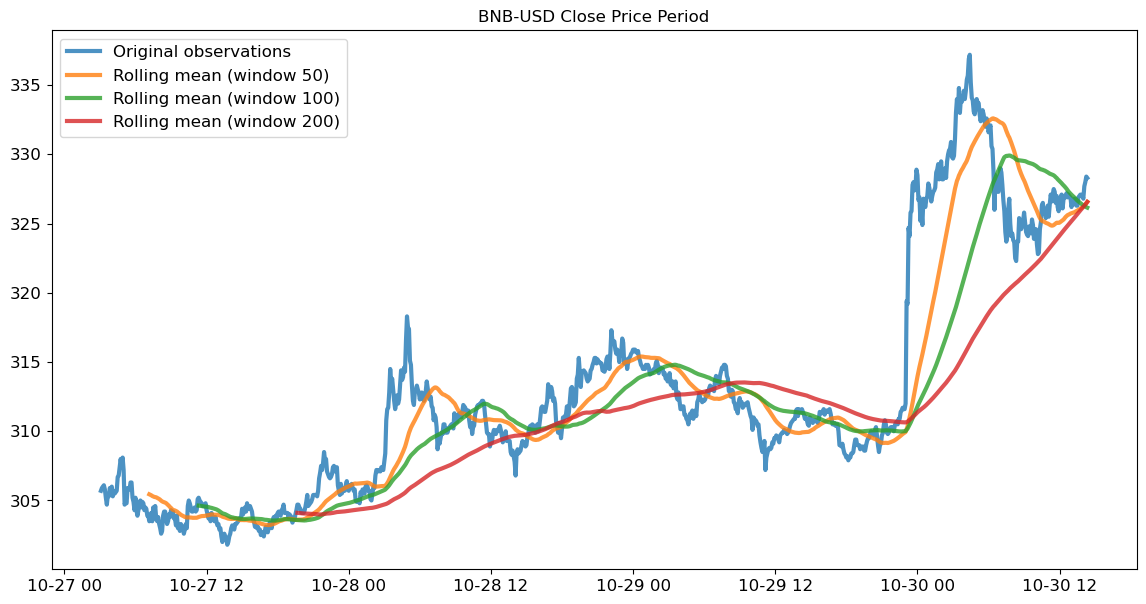

In [100]:
plt.figure(figsize=(14, 7))
plt.plot(close_price.index, close_price, lw=3, alpha=0.8,label='Original observations')
plt.plot(close_price.index, rroll_p50, lw=3, alpha=0.8,label='Rolling mean (window 50)')
plt.plot(close_price.index, rroll_p100, lw=3, alpha=0.8,label='Rolling mean (window 100)')
plt.plot(close_price.index, rroll_p200, lw=3, alpha=0.8,label='Rolling mean (window 200)')
plt.title('BNB-USD Close Price Period')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

## Dual Moving Average Crossover

In [101]:
short_window = 30
mid_window = 50

signals = pd.DataFrame(index=close_price.index)
signals['signal'] = 0.0

roll_pshort = close_price.rolling(window=short_window).mean()
roll_pmid = close_price.rolling(window=mid_window).mean()

signals['short_mavg'] = roll_pshort
signals['mid_mavg'] = roll_pmid
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

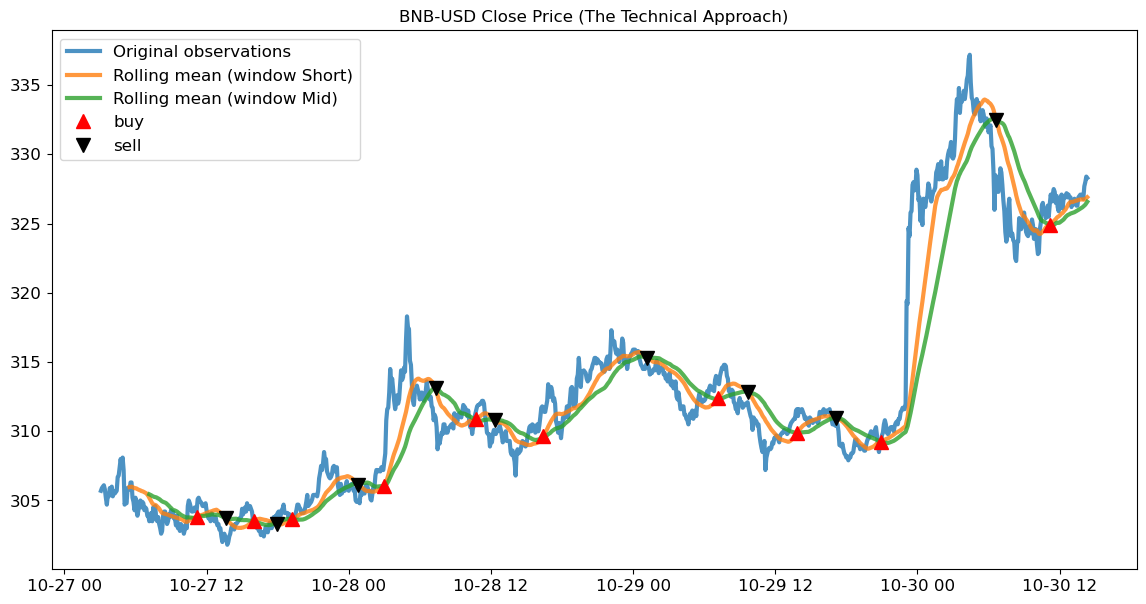

In [116]:
plt.figure(figsize=(14, 7))
plt.plot(close_price.index, close_price, lw=3, alpha=0.8,label='Original observations')
plt.plot(close_price.index, roll_pshort, lw=3, alpha=0.8,label='Rolling mean (window Short)')
plt.plot(close_price.index, roll_pmid, lw=3, alpha=0.8,label='Rolling mean (window Mid)')

plt.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k', label='sell')

plt.title('BNB-USD Close Price (The Technical Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [106]:
initial_investment = close_price.loc[list(signals[signals.positions == 1.0].index)][0]
bought = np.sum(close_price.loc[list(signals[signals.positions == 1.0].index)]*-1.0)
sold = np.sum(close_price.loc[list(signals[signals.positions == -1.0].index)])
current_value = close_price[-1]

balance = pd.DataFrame([close_price.loc[list(signals[signals.positions == 1.0].index)]*-1.0,
              close_price.loc[list(signals[signals.positions == -1.0].index)]]).transpose()
balance = balance.fillna(0)
balance['balance'] = balance.sum(axis=1)

print("Initial investment amount: {0:.2f} USD".format(initial_investment))
print("Maximum invested amount: {0:.2f} USD".format(abs(min(balance.cumsum().balance))))
print("Current asset value: {0:.2f} USD".format(bought+sold+current_value))

Initial investment amount: 304.30 USD
Maximum invested amount: 310.40 USD
Current asset value: 22.40 USD


## Exponential Moving Average

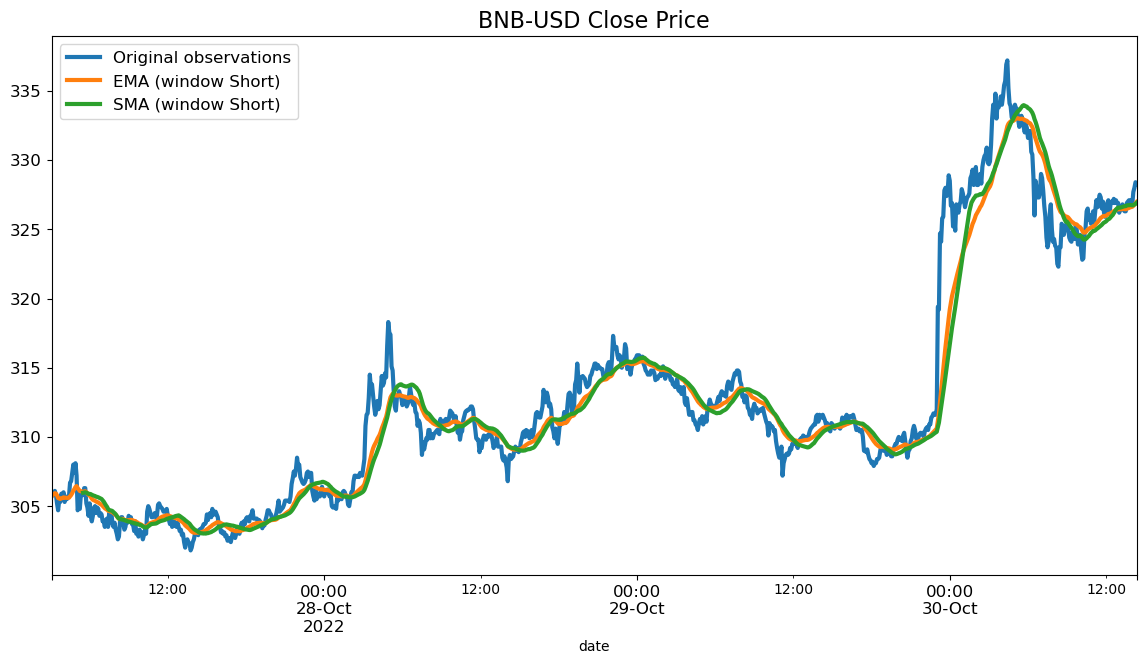

In [111]:
exp_weighted_mean = close_price.ewm(span=30).mean()
sma_pshort = close_price.rolling(window=30).mean()
ax = close_price.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='EMA (window Short)')
sma_pshort.plot(ax=ax, lw=3, label='SMA (window Short)')
plt.title('BNB-USD Close Price', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [112]:
exp_weighted_mean = close_price.ewm(span=30).mean()
signals_ema = pd.DataFrame(index=close_price.index)
signals_ema['signal'] = 0.0

signals_ema['original'] = close_price
signals_ema['EMA'] = exp_weighted_mean

signals_ema['signal'] = np.where(signals_ema['original'] 
                                            > signals_ema['EMA'], 1.0, 0.0)
signals_ema['positions'] = signals_ema['signal'].diff()

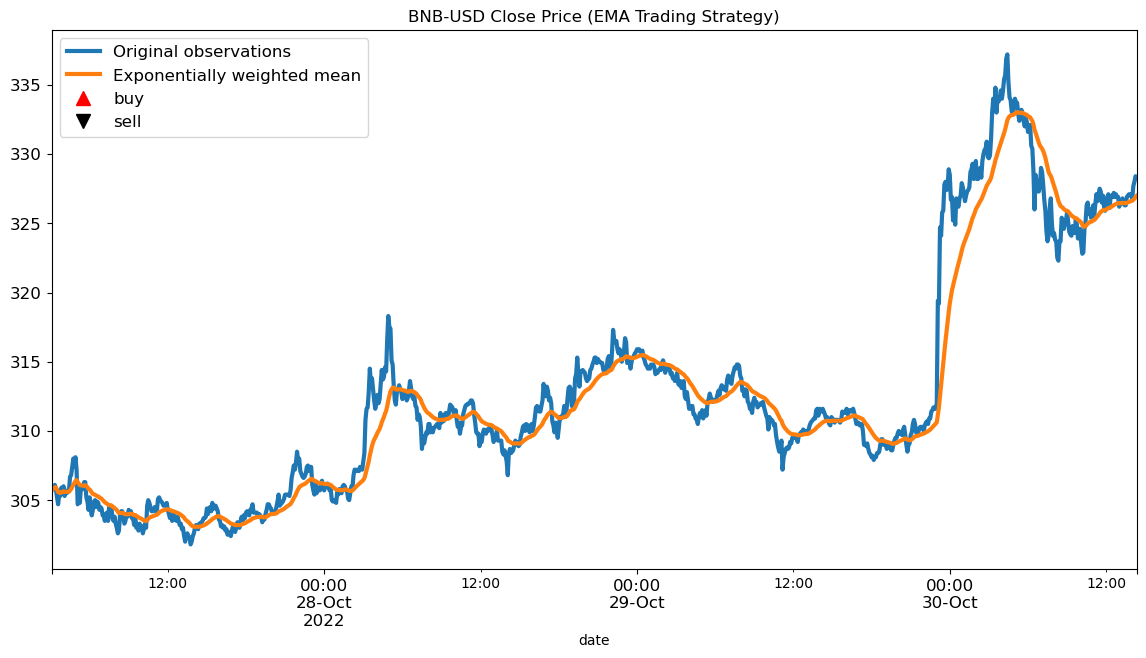

In [114]:
plt.figure(figsize=(14, 7))

ax = close_price.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='Exponentially weighted mean')

plt.plot(signals_ema.loc[signals_ema.positions == 1.0].index, 
         signals_ema.EMA[signals_ema.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals_ema.loc[signals_ema.positions == -1.0].index, 
         signals_ema.EMA[signals_ema.positions == -1.0],
         'v', markersize=10, color='k', label='sell')

plt.title('BNB-USD Close Price (EMA Trading Strategy)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [118]:
initial_investment = close_price.loc[list(signals_ema[signals_ema.positions == 1.0].index)][0]
bought = np.sum(close_price.loc[list(signals_ema[signals_ema.positions == 1.0].index)]*-1.0)
sold = np.sum(close_price.loc[list(signals_ema[signals_ema.positions == -1.0].index)])
current_value = close_price[-1]

balance_ema = pd.DataFrame([close_price.loc[list(signals_ema[signals_ema.positions == 1.0].index)]*-1.0,
              close_price.loc[list(signals_ema[signals_ema.positions == -1.0].index)]]).transpose()
balance_ema = balance_ema.fillna(0)
balance_ema['balance'] = balance_ema.sum(axis=1)

print("Initial investment amount: {0:.2f} USD".format(initial_investment))
print("Maximum invested amount: {0:.2f} USD".format(abs(min(balance_ema.cumsum().balance))))
print("Current asset value: {0:.2f} USD".format(bought+sold+current_value))

Initial investment amount: 305.90 USD
Maximum invested amount: 311.60 USD
Current asset value: 28.20 USD


In [119]:
signals

signal  short_mavg  mid_mavg  positions
date                                                        
2022-10-27 03:05:00     0.0         NaN       NaN        NaN
2022-10-27 03:10:00     0.0         NaN       NaN        0.0
2022-10-27 03:15:00     0.0         NaN       NaN        0.0
2022-10-27 03:20:00     0.0         NaN       NaN        0.0
2022-10-27 03:25:00     0.0         NaN       NaN        0.0
...                     ...         ...       ...        ...
2022-10-30 14:00:00     1.0  326.730000   326.234        0.0
2022-10-30 14:05:00     1.0  326.743333   326.302        0.0
2022-10-30 14:10:00     1.0  326.793333   326.370        0.0
2022-10-30 14:15:00     1.0  326.840000   326.468        0.0
2022-10-30 14:20:00     1.0  326.910000   326.578        0.0

[1000 rows x 4 columns]

In [120]:
signals_ema

signal  original         EMA  positions
date                                                        
2022-10-27 03:05:00     0.0     305.7  305.700000        NaN
2022-10-27 03:10:00     1.0     305.9  305.803333        1.0
2022-10-27 03:15:00     1.0     306.0  305.873306        0.0
2022-10-27 03:20:00     1.0     306.1  305.935769        0.0
2022-10-27 03:25:00     0.0     305.8  305.904878       -1.0
...                     ...       ...         ...        ...
2022-10-30 14:00:00     1.0     326.8  326.623815        0.0
2022-10-30 14:05:00     1.0     327.7  326.693246        0.0
2022-10-30 14:10:00     1.0     328.0  326.777553        0.0
2022-10-30 14:15:00     1.0     328.4  326.882227        0.0
2022-10-30 14:20:00     1.0     328.3  326.973696        0.0

[1000 rows x 4 columns]